In [1]:
#!davix-ls -l davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/preselection_UL2017_v15_monitoring_remote -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/

In [2]:
#!davix-ls -l davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/preselection_UL2017_v21_monitoring_remote -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/

In [3]:

import os

directory = "preselection_UL2017_v24_monitoring_remote"
import os
if not os.path.exists(directory):
    os.makedirs(directory)


In [4]:

for i in range(0,276):
    csv_file = "main_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
    csv_file = "main_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
for i in range(0,5):
    csv_file = "GluGlu_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
    csv_file = "GluGlu_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
for i in range(0,5):
    csv_file = "WZ_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
    csv_file = "WZ_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))


In [5]:
import pandas as pd
import os

for i in range(0,276):
    #print(i)
    #csv_file = "distrdf_monitor_{}.csv".format(i)
    csv_file = "main_monitor_{}.csv".format(i)

    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    if i == 0:
        df = pd.read_csv(path)
    else:
        df = pd.concat([df, pd.read_csv(path)])
        
for i in range(0,5):
    #print(i)
    csv_file = "GluGlu_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_tmp = pd.read_csv(path)
    df_tmp["task_id"] = df_tmp["task_id"] + 276
    df = pd.concat([df, df_tmp])
    
for i in range(0,5):
    #print(i)
    csv_file = "WZ_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_tmp = pd.read_csv(path)
    df_tmp["task_id"] = df_tmp["task_id"] + 281
    df = pd.concat([df, df_tmp])

In [6]:
for i in range(0,276):
    #print(i)
    #csv_file = "distrdf_monitor_{}.csv".format(i)
    csv_file = "main_runtime_{}.csv".format(i)

    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    if i == 0:
        df_runtime = pd.read_csv(path)
    else:
        df_runtime = pd.concat([df_runtime, pd.read_csv(path)])
        
for i in range(0,5):
    #print(i)
    csv_file = "GluGlu_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_tmp = pd.read_csv(path)
    df_tmp["task_id"] = df_tmp["task_id"] + 276
    df_runtime = pd.concat([df_runtime, df_tmp])
    
for i in range(0,5):
    #print(i)
    csv_file = "WZ_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_tmp = pd.read_csv(path)
    df_tmp["task_id"] = df_tmp["task_id"] + 281
    df_runtime = pd.concat([df_runtime, df_tmp])

In [7]:
df_runtime["rate"] = df_runtime['processed_entries']/df_runtime['runtime_event_loop']

In [8]:
df_runtime["overall_rate"] = df_runtime['processed_entries']/(df_runtime['runtime_setup'] + df_runtime['runtime_rdf_creation'] + df_runtime['runtime_event_loop'])

In [9]:
df_runtime

,task_id,hostname,processed_entries,runtime_mapper,runtime_setup,runtime_rdf_creation,runtime_event_loop,rate,overall_rate
0,0,wl-07-37.lnl.infn.it,3654652,423.696395,9.010586,2.669896,412.014822,8870.195451,8625.660856
0,1,wl-07-38.lnl.infn.it,2903752,343.909169,14.434882,2.384128,327.090002,8877.532128,8443.372811
0,2,wl-07-39.lnl.infn.it,4452929,477.540950,8.697415,3.136785,465.706589,9561.662011,9324.709221
0,3,wl-07-35.lnl.infn.it,1100611,244.510978,83.265155,2.591005,158.638612,6937.850665,4501.572738
0,4,wl-07-37.lnl.infn.it,2572192,297.992414,9.080634,1.494908,287.416696,8949.347881,8631.741601
...,...,...,...,...,...,...,...,...,...
0,281,wl-07-34.lnl.infn.it,192000,290.638721,224.380774,3.097553,63.143482,3040.693893,660.652415
0,282,wl-07-39.lnl.infn.it,407000,52.826668,8.766317,0.653385,43.406765,9376.418633,7704.471351
0,283,wl-07-34.lnl.infn.it,3054000,377.602056,93.522471,3.708816,280.354453,10893.352919,8088.229178
0,284,wl-07-34.lnl.infn.it,3294000,277.340224,8.834808,2.263491,266.241072,12372.245860,11877.145277


In [10]:
(df_runtime['overall_rate']*df_runtime['processed_entries']).sum()/df_runtime['processed_entries'].sum()

8098.565938119774

In [11]:
(df_runtime['rate']*df_runtime['processed_entries']).sum()/df_runtime['processed_entries'].sum()

8725.521299827175

In [12]:
df_runtime['processed_entries'].sum()

656978035

In [13]:
(df_runtime['runtime_setup'] + df_runtime['runtime_rdf_creation'] + df_runtime['runtime_event_loop']).sum()/3600/92

0.277807715119803

In [14]:
import numpy as np
df_grouped = df.groupby(['task_id']).agg(mean_memory_rss=('memory_rss',np.mean),mean_cpu_percent=('cpu_percent',np.mean), mean_net_read=('net_read',np.max),  hostname=('hostname', np.max))

In [15]:
df_grouped

,mean_memory_rss,mean_cpu_percent,mean_net_read,hostname
task_id,,,,
0,9.992467e+08,91.172813,33175064325452,wl-07-37.lnl.infn.it
1,9.787838e+08,86.313411,28444712111910,wl-07-38.lnl.infn.it
2,1.073823e+09,92.326834,26302587835534,wl-07-39.lnl.infn.it
3,7.657899e+08,93.830738,19907546282050,wl-07-35.lnl.infn.it
4,9.553058e+08,89.310403,33149765737730,wl-07-37.lnl.infn.it
...,...,...,...,...
281,6.710644e+08,49.988276,31160536705318,wl-07-34.lnl.infn.it
282,9.629553e+08,76.298113,26276008684557,wl-07-39.lnl.infn.it
283,8.116308e+08,90.372944,31166692571204,wl-07-34.lnl.infn.it


In [16]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [17]:
df_grouped

,mean_memory_rss,mean_cpu_percent,mean_net_read,hostname
task_id,,,,
0,9.992467e+08,91.172813,33175064325452,wl-07-37.lnl.infn.it
1,9.787838e+08,86.313411,28444712111910,wl-07-38.lnl.infn.it
2,1.073823e+09,92.326834,26302587835534,wl-07-39.lnl.infn.it
3,7.657899e+08,93.830738,19907546282050,wl-07-35.lnl.infn.it
4,9.553058e+08,89.310403,33149765737730,wl-07-37.lnl.infn.it
...,...,...,...,...
281,6.710644e+08,49.988276,31160536705318,wl-07-34.lnl.infn.it
282,9.629553e+08,76.298113,26276008684557,wl-07-39.lnl.infn.it
283,8.116308e+08,90.372944,31166692571204,wl-07-34.lnl.infn.it


array([[<AxesSubplot:title={'center':'mean_memory_rss'}>]], dtype=object)

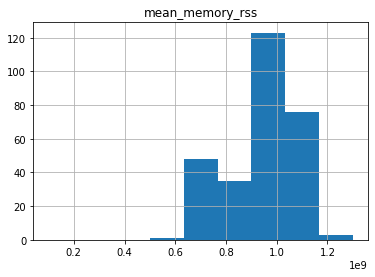

In [18]:
df_grouped.hist(column="mean_memory_rss", bins = np.linspace(1e8, 1.3e9, num=10))

array([[<AxesSubplot:title={'center':'mean_cpu_percent'}>]], dtype=object)

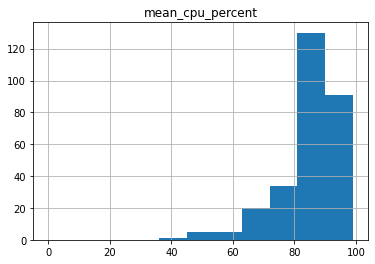

In [19]:
df_grouped.hist(column="mean_cpu_percent", bins = range(0,100,9))

In [20]:
df_grouped[(df_grouped["mean_cpu_percent"] < 40) & (df_grouped["mean_cpu_percent"] > 20)]

,mean_memory_rss,mean_cpu_percent,mean_net_read,hostname
task_id,,,,


In [21]:
df_grouped[(df_grouped["mean_cpu_percent"] < 40)].index

Int64Index([], dtype='int64', name='task_id')

In [22]:
df_grouped

,mean_memory_rss,mean_cpu_percent,mean_net_read,hostname
task_id,,,,
0,9.992467e+08,91.172813,33175064325452,wl-07-37.lnl.infn.it
1,9.787838e+08,86.313411,28444712111910,wl-07-38.lnl.infn.it
2,1.073823e+09,92.326834,26302587835534,wl-07-39.lnl.infn.it
3,7.657899e+08,93.830738,19907546282050,wl-07-35.lnl.infn.it
4,9.553058e+08,89.310403,33149765737730,wl-07-37.lnl.infn.it
...,...,...,...,...
281,6.710644e+08,49.988276,31160536705318,wl-07-34.lnl.infn.it
282,9.629553e+08,76.298113,26276008684557,wl-07-39.lnl.infn.it
283,8.116308e+08,90.372944,31166692571204,wl-07-34.lnl.infn.it


array([[<AxesSubplot:title={'center':'mean_net_read'}>]], dtype=object)

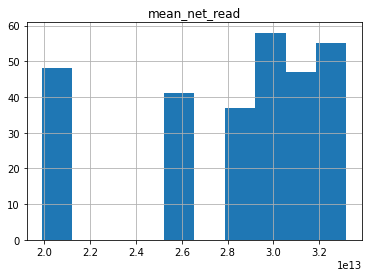

In [23]:
df_grouped.hist(column="mean_net_read")

In [24]:
df

,task_id,cpu_percent,memory_rss,memory_percent_rss,net_read,timestamp,hostname
0,0,0.0,958013440,1.422121,33145680280931,2022-08-03 19:08:00.745936,wl-07-37.lnl.infn.it
1,0,15.0,958132224,1.422297,33145746058381,2022-08-03 19:08:01.747947,wl-07-37.lnl.infn.it
2,0,10.0,958132224,1.422297,33145843448046,2022-08-03 19:08:02.749953,wl-07-37.lnl.infn.it
3,0,16.0,958222336,1.422431,33145883236509,2022-08-03 19:08:03.751019,wl-07-37.lnl.infn.it
4,0,62.9,958799872,1.423288,33145982204934,2022-08-03 19:08:04.751878,wl-07-37.lnl.infn.it
...,...,...,...,...,...,...,...
97,285,81.7,1040384000,1.544396,29734860382372,2022-08-03 19:06:20.113396,wl-07-36.lnl.infn.it
98,285,99.8,1040408576,1.544432,29734930756335,2022-08-03 19:06:21.114926,wl-07-36.lnl.infn.it
99,285,97.5,1040437248,1.544475,29735021992793,2022-08-03 19:06:22.120072,wl-07-36.lnl.infn.it
100,285,76.9,1040449536,1.544493,29735091207779,2022-08-03 19:06:23.121876,wl-07-36.lnl.infn.it


In [25]:
df['hostname'].unique()

array(['wl-07-37.lnl.infn.it', 'wl-07-38.lnl.infn.it',
       'wl-07-39.lnl.infn.it', 'wl-07-35.lnl.infn.it',
       'wl-07-34.lnl.infn.it', 'wl-07-36.lnl.infn.it'], dtype=object)

In [26]:
df[df["hostname"]=='wl-07-36.lnl.infn.it']["cpu_percent"].mean()

88.83885015212981

In [27]:
df[df["hostname"]=='wl-07-36.lnl.infn.it']["memory_rss"].mean()/1e6

967.7262482434078

In [28]:
df

,task_id,cpu_percent,memory_rss,memory_percent_rss,net_read,timestamp,hostname
0,0,0.0,958013440,1.422121,33145680280931,2022-08-03 19:08:00.745936,wl-07-37.lnl.infn.it
1,0,15.0,958132224,1.422297,33145746058381,2022-08-03 19:08:01.747947,wl-07-37.lnl.infn.it
2,0,10.0,958132224,1.422297,33145843448046,2022-08-03 19:08:02.749953,wl-07-37.lnl.infn.it
3,0,16.0,958222336,1.422431,33145883236509,2022-08-03 19:08:03.751019,wl-07-37.lnl.infn.it
4,0,62.9,958799872,1.423288,33145982204934,2022-08-03 19:08:04.751878,wl-07-37.lnl.infn.it
...,...,...,...,...,...,...,...
97,285,81.7,1040384000,1.544396,29734860382372,2022-08-03 19:06:20.113396,wl-07-36.lnl.infn.it
98,285,99.8,1040408576,1.544432,29734930756335,2022-08-03 19:06:21.114926,wl-07-36.lnl.infn.it
99,285,97.5,1040437248,1.544475,29735021992793,2022-08-03 19:06:22.120072,wl-07-36.lnl.infn.it
100,285,76.9,1040449536,1.544493,29735091207779,2022-08-03 19:06:23.121876,wl-07-36.lnl.infn.it


<AxesSubplot:xlabel='Time [s]', ylabel='CPU usage percentage'>

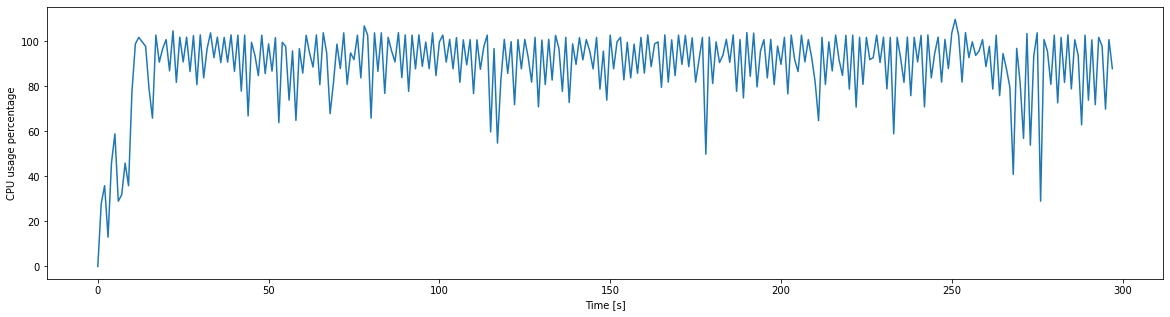

In [29]:
df[df["task_id"] == 4]['cpu_percent'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "CPU usage percentage")

In [30]:
df[df["task_id"] == 1]['cpu_percent']

0        0.0
1       13.9
2        6.0
3       13.0
4       13.0
       ...  
338     93.8
339     95.9
340     68.9
341    103.9
342     79.6
Name: cpu_percent, Length: 343, dtype: float64

In [31]:
df[df["task_id"] == 1]

,task_id,cpu_percent,memory_rss,memory_percent_rss,net_read,timestamp,hostname
0,1,0.0,945590272,1.403679,28420492568083,2022-08-03 19:07:27.400378,wl-07-38.lnl.infn.it
1,1,13.9,945917952,1.404166,28420579645938,2022-08-03 19:07:28.401865,wl-07-38.lnl.infn.it
2,1,6.0,945983488,1.404263,28420638300198,2022-08-03 19:07:29.404234,wl-07-38.lnl.infn.it
3,1,13.0,945987584,1.404269,28420721854520,2022-08-03 19:07:30.406373,wl-07-38.lnl.infn.it
4,1,13.0,946077696,1.404403,28420785274317,2022-08-03 19:07:31.407278,wl-07-38.lnl.infn.it
...,...,...,...,...,...,...,...
338,1,93.8,1022148608,1.517326,28444443111936,2022-08-03 19:13:06.081127,wl-07-38.lnl.infn.it
339,1,95.9,1022148608,1.517326,28444500019813,2022-08-03 19:13:07.082366,wl-07-38.lnl.infn.it
340,1,68.9,1022148608,1.517326,28444575139761,2022-08-03 19:13:08.083324,wl-07-38.lnl.infn.it
341,1,103.9,1022148608,1.517326,28444625855238,2022-08-03 19:13:09.084295,wl-07-38.lnl.infn.it


In [32]:
df_grouped_full = df.groupby(['task_id'])

In [33]:
df_grouped_full

task_id
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
281    AxesSubplot(0.125,0.125;0.775x0.755)
282    AxesSubplot(0.125,0.125;0.775x0.755)
283    AxesSubplot(0.125,0.125;0.775x0.755)
284    AxesSubplot(0.125,0.125;0.775x0.755)
285    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cpu_percent, Length: 286, dtype: object

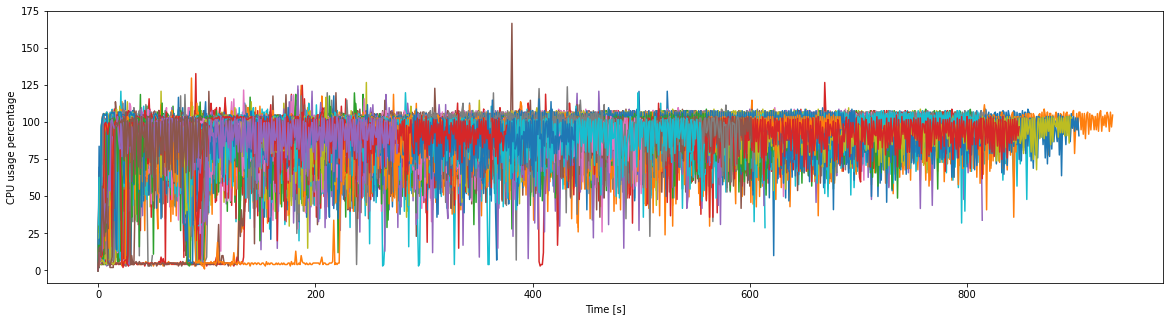

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
df_grouped_full['cpu_percent'].plot(ax = ax, xlabel = "Time [s]", ylabel = "CPU usage percentage")

3


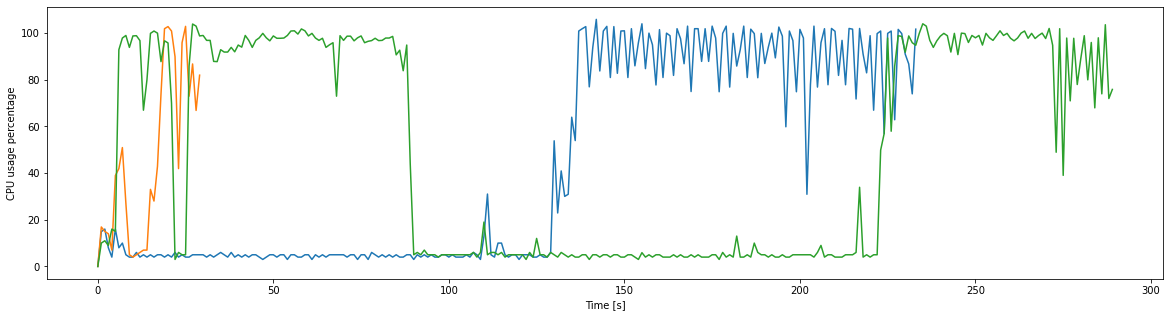

In [35]:
df_grouped_full_strange = df[df['task_id'].isin(df_grouped[df_grouped['mean_cpu_percent'] < 50].index.to_list())].groupby(['task_id'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
df_grouped_full_strange['cpu_percent'].plot(ax = ax, xlabel = "Time [s]", ylabel = "CPU usage percentage")
print(len(df_grouped_full_strange))

<AxesSubplot:xlabel='Time [s]', ylabel='memory usage [bytes]'>

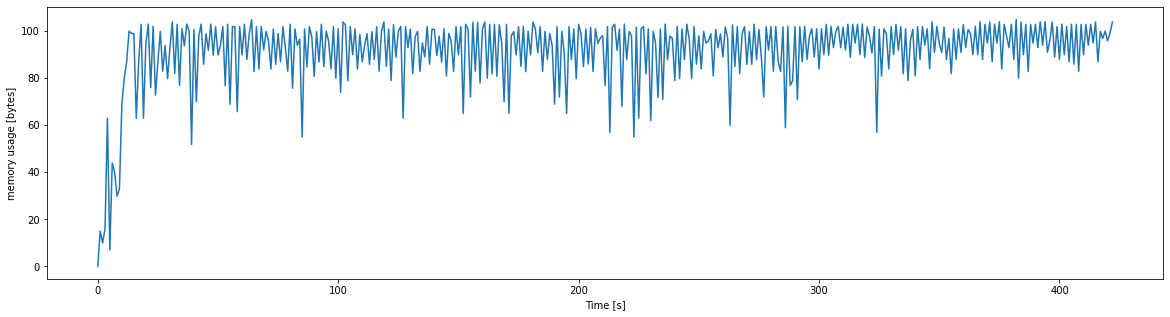

In [43]:
df[df["task_id"] == 0]['cpu_percent'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "memory usage [bytes]")

task_id
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
281    AxesSubplot(0.125,0.125;0.775x0.755)
282    AxesSubplot(0.125,0.125;0.775x0.755)
283    AxesSubplot(0.125,0.125;0.775x0.755)
284    AxesSubplot(0.125,0.125;0.775x0.755)
285    AxesSubplot(0.125,0.125;0.775x0.755)
Name: memory_rss, Length: 286, dtype: object

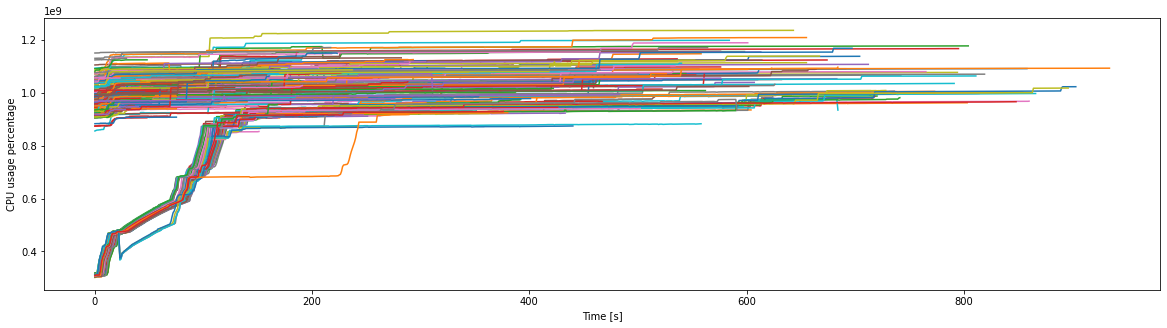

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
df_grouped_full['memory_rss'].plot(ax = ax, xlabel = "Time [s]", ylabel = "CPU usage percentage")

<AxesSubplot:xlabel='Time [s]', ylabel='memory usage [bytes]'>

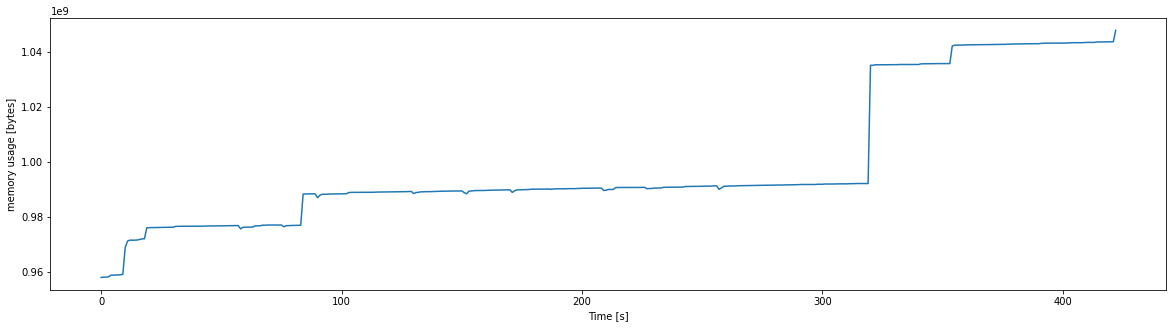

In [37]:
df[df["task_id"] == 0]['memory_rss'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "memory usage [bytes]")

<AxesSubplot:xlabel='Time [s]', ylabel='memory usage [bytes]'>

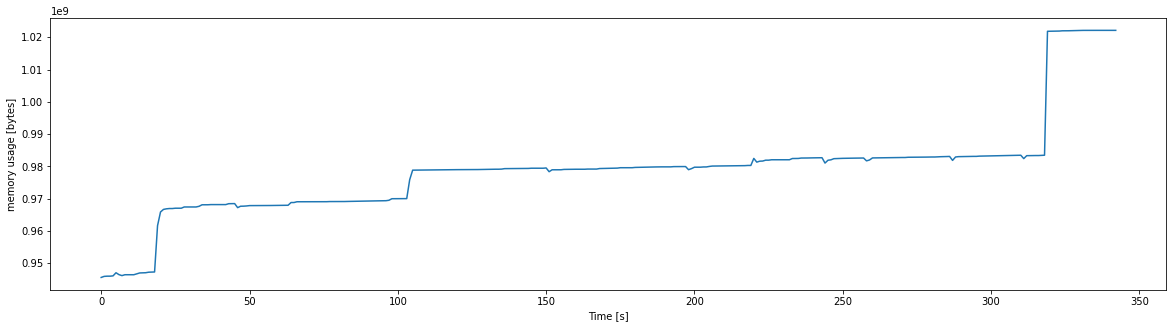

In [38]:
df[df["task_id"] == 1]['memory_rss'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "memory usage [bytes]")

In [39]:
df_grouped_full[].plot

SyntaxError: invalid syntax (3516549891.py, line 1)